In [2]:
from google.cloud import aiplatform

In [3]:
# Initialize the AI Platform client with your project and location
project = "aa-ai-specialisation"
location = "us-central1"
endpoint_id = "5557804779012358144"
endpoint = f"{location}-aiplatform.googleapis.com"
client_options = {"api_endpoint": endpoint}

In [4]:
def endpoint_predict_sample(
    project: str, location: str, instances: list, endpoint: str
):
    aiplatform.init(project=project, location=location)

    endpoint = aiplatform.Endpoint(endpoint)

    prediction = endpoint.predict(instances=instances)
    return prediction.predictions

In [5]:
%load_ext google.cloud.bigquery

The google.cloud.bigquery extension is already loaded. To reload it, use:
  %reload_ext google.cloud.bigquery


In [6]:
%%bigquery train_df
SELECT * FROM `aa-ai-specialisation.black_friday.preprocessed_train_df`

Query is running:   0%|          |

Downloading:   0%|          |

In [6]:
train_df

,User_ID,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,missing_Product_Category_2,missing_Product_Category_3,City_A,City_B,City_C
0,1003521,P00350942,0,2,0,3,0,3,4,5,10718,0,0,0,1,0
1,1003521,P00295942,0,2,0,3,0,2,5,15,13002,0,0,0,1,0
2,1003521,P00086042,0,2,0,3,0,8,14,17,9764,0,0,0,1,0
3,1003521,P00086442,0,2,0,3,0,8,13,15,7904,0,0,0,1,0
4,1003521,P00192042,0,2,0,3,0,5,9,14,5328,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1003261,P00324942,0,4,20,1,1,5,0,0,7061,1,1,0,1,0
550064,1003261,P00358742,0,4,20,1,1,5,0,0,5392,1,1,0,1,0
550065,1003261,P00116342,0,4,20,1,1,2,0,0,16489,1,1,0,1,0
550066,1003261,P00087442,0,4,20,1,1,5,0,0,7111,1,1,0,1,0


In [7]:
train_df_copy = train_df.copy()
X= train_df_copy.drop(columns=['User_ID', 'Product_ID','Purchase'])
y = train_df_copy['Purchase'].astype(int)

In [46]:
X.iloc[0]

Gender                        0
Age                           2
Occupation                    0
Stay_In_Current_City_Years    3
Marital_Status                0
Product_Category_1            3
Product_Category_2            4
Product_Category_3            5
missing_Product_Category_2    0
missing_Product_Category_3    0
City_A                        0
City_B                        1
City_C                        0
Name: 0, dtype: Int64

In [13]:
instances

[[0, 2, 0, 3, 0, 3, 4, 5, 0, 0, 0, 1, 0]]

In [114]:
instances = [[1, 5, 0, 3, 0, 3, 4, 5, 0, 0, 0, 0, 1]]

In [115]:
prediction = endpoint_predict_sample(project, location, instances, endpoint_id)
prediction[0]

3090.90478515625

In [7]:
genders = [0, 1]
Age = [0, 1, 2, 3, 4, 5, 6]
Occupation = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
Stay_In_Current_City_Years = 3
Marital_Status = [0, 1]
Product_Category_1 = 3
Product_Category_2 = 4
Product_Category_3 = 5
missing_Product_Category_2 = 0
missing_Product_Category_3 = 0
City = [0, 1, 2]
ans = []
instance_group = []
for g in genders:
    for a in Age:
        for o in Occupation:
            for m in Marital_Status:
                for c in City:
                    if c == 0:
                        instances = [[g, a, o, Stay_In_Current_City_Years, m, Product_Category_1, Product_Category_2, Product_Category_3, missing_Product_Category_2, missing_Product_Category_3, 1, 0, 0]]
                    elif c == 1:
                        instances = [[g, a, o, Stay_In_Current_City_Years, m, Product_Category_1, Product_Category_2, Product_Category_3, missing_Product_Category_2, missing_Product_Category_3, 0, 1, 0]]
                    elif c == 2:
                        instances = [[g, a, o, Stay_In_Current_City_Years, m, Product_Category_1, Product_Category_2, Product_Category_3, missing_Product_Category_2, missing_Product_Category_3, 0, 0, 1]]
                    ans.append((endpoint_predict_sample(project, location, instances, endpoint_id)[0], instances))

In [8]:
ans.sort()

In [9]:
ans[-10: -1]

[(11681.3291015625, [[1, 5, 20, 3, 0, 3, 4, 5, 0, 0, 0, 0, 1]]),
 (11722.3603515625, [[1, 6, 20, 3, 0, 3, 4, 5, 0, 0, 0, 0, 1]]),
 (11737.6630859375, [[1, 5, 18, 3, 1, 3, 4, 5, 0, 0, 0, 0, 1]]),
 (11745.583984375, [[1, 0, 5, 3, 0, 3, 4, 5, 0, 0, 0, 1, 0]]),
 (11753.853515625, [[0, 6, 20, 3, 0, 3, 4, 5, 0, 0, 0, 0, 1]]),
 (11807.3056640625, [[0, 5, 20, 3, 0, 3, 4, 5, 0, 0, 0, 0, 1]]),
 (11823.4052734375, [[1, 0, 0, 3, 1, 3, 4, 5, 0, 0, 0, 1, 0]]),
 (11848.3544921875, [[1, 0, 0, 3, 0, 3, 4, 5, 0, 0, 0, 1, 0]]),
 (11909.0478515625, [[0, 5, 15, 3, 1, 3, 4, 5, 0, 0, 1, 0, 0]])]

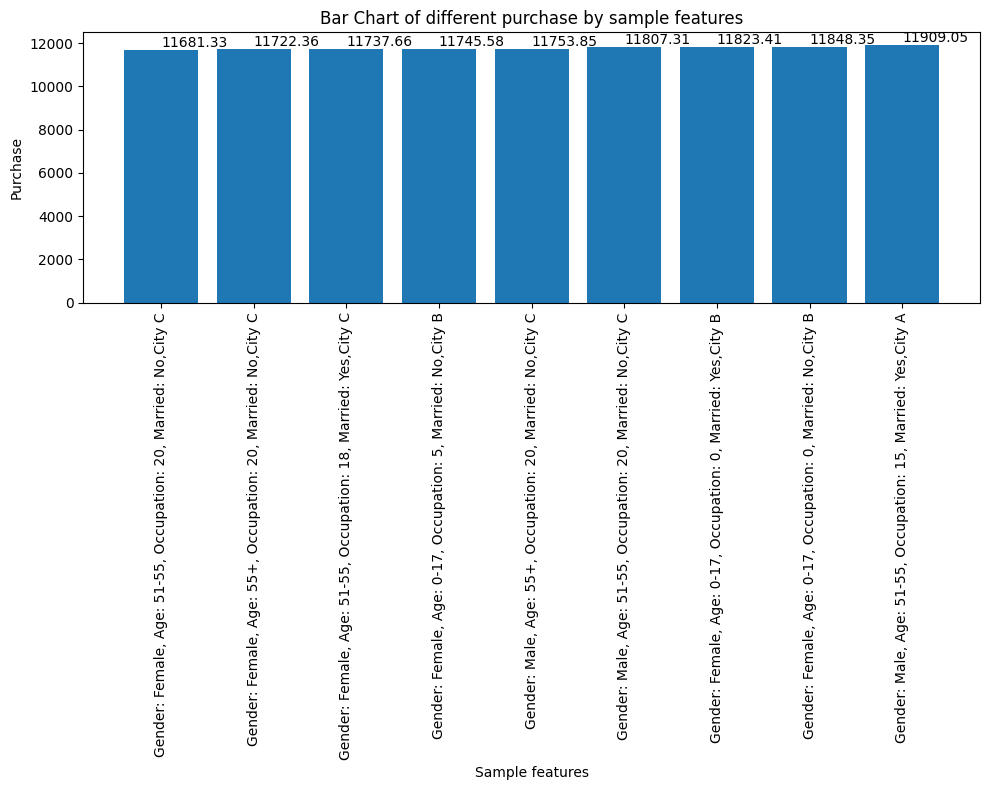

In [13]:
import matplotlib.pyplot as plt

# Data
data = ans[-10: -1]

# Age mapping
age_map = {0: "0-17", 1: "18-25", 2: "26-35", 3: "36-45", 4: "46-50", 5: "51-55", 6: "55+"}

# Extracting values and labels
values = [item[0] for item in data]
labels = ["Gender: " + ("Male" if item[1][0][0] == 0 else "Female") + 
          ", Age: " + age_map[item[1][0][1]] + 
          ", Occupation: " + str(item[1][0][2]) + 
          ", Married: " + ("Yes" if item[1][0][4] == 1 else "No") +
          "," + ("City A" if item[1][0][10] == 1 else "City B" if item[1][0][11] == 1 else "City C") for item in data]

# Plotting
plt.figure(figsize=(10, 8))
bars = plt.bar(range(len(values)), values, tick_label=labels)
plt.xticks(rotation=90)
plt.xlabel("Sample features")
plt.ylabel("Purchase")
plt.title("Bar Chart of different purchase by sample features")

# Adding labels to bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, round(yval, 2), va='bottom')  # va: vertical alignment

plt.tight_layout()
plt.show()